# Mini Tarefa - Aula 03 - 29/09/2023

Usando o dataset de infarto (heart.csv), obtenha a acurácia de três modelos
- AdaBoost com 100 estimadores
- Gradient Boost com 120 estimadores e taxa de aprendizado de 0.001
- XGBoost com profundidade máxima de 6 e taxa de aprendizado de 0.2  
  
Utilize todas as variáveis presentes no dataset e divida em treino e teste, sendo 20% para teste, com random state igual a 42. Envie o valor encontrado no link do [forms](https://forms.gle/reLfqC8DBC2MBPXR8)

## Tratando Dataset

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
# df = pd.read_csv('/content/drive/MyDrive/ADA_Braskem/Curso/7-[DS-PY-010] MACHINE LEARNING II/datasets/heart.csv')
df = pd.read_csv('datasets/heart.csv')

In [27]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [28]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [30]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [31]:
df.target.value_counts(normalize=True)

target
1    0.544554
0    0.455446
Name: proportion, dtype: float64

In [32]:
# sns.pairplot(df, kind='reg', diag_kind='kde', plot_kws={'line_kws':{'color':'red'}})

In [33]:
# sns.heatmap(df.corr(), annot=True)

## AdaBoost
AdaBoost com 100 estimadores

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [35]:
X = df.drop(columns='target', axis=1)
y = df['target']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
ab = AdaBoostClassifier(random_state=42, n_estimators=100)
ab.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)


Métricas de avaliação de treino:
[[104   5]
 [  4 129]]


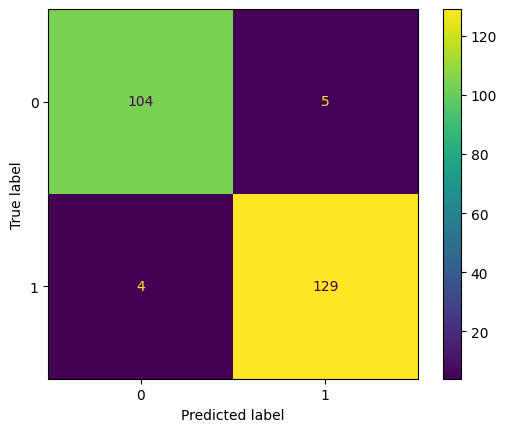

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       109
           1       0.96      0.97      0.97       133

    accuracy                           0.96       242
   macro avg       0.96      0.96      0.96       242
weighted avg       0.96      0.96      0.96       242


Métricas de avaliação de teste:
[[24  5]
 [ 9 23]]


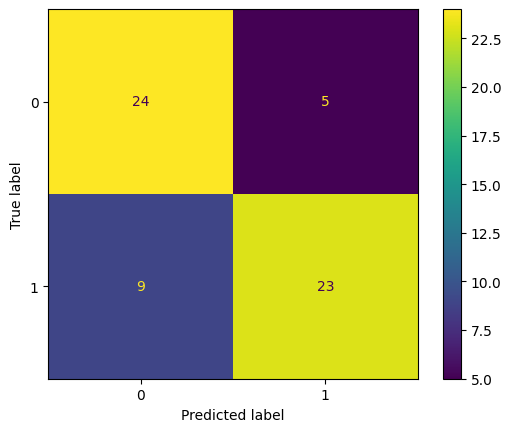

              precision    recall  f1-score   support

           0       0.73      0.83      0.77        29
           1       0.82      0.72      0.77        32

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61



In [37]:
print("\nMétricas de avaliação de treino:")
y_pred_train = ab.predict(X_train)
print(confusion_matrix(y_train, y_pred_train))
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()
print(classification_report(y_train, y_pred_train))

print("\nMétricas de avaliação de teste:")
y_pred_test = ab.predict(X_test)
print(confusion_matrix(y_test, y_pred_test))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()
print(classification_report(y_test, y_pred_test))

## Gradient Boost
Gradient Boost com 120 estimadores e taxa de aprendizado de 0.001

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [39]:
X = df.drop(columns='target', axis=1)
y = df['target']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
gb = GradientBoostingClassifier(n_estimators=120, learning_rate= 0.001, random_state=42)
gb.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.001, n_estimators=120,
                           random_state=42)


Métricas de avaliação de treino:
[[ 48  61]
 [  0 133]]


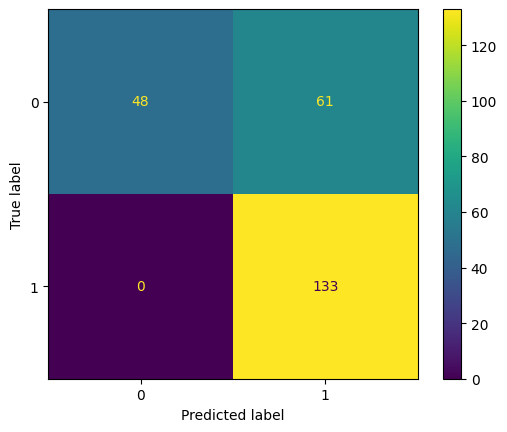

              precision    recall  f1-score   support

           0       1.00      0.44      0.61       109
           1       0.69      1.00      0.81       133

    accuracy                           0.75       242
   macro avg       0.84      0.72      0.71       242
weighted avg       0.83      0.75      0.72       242


Métricas de avaliação de teste:
[[20  9]
 [ 1 31]]


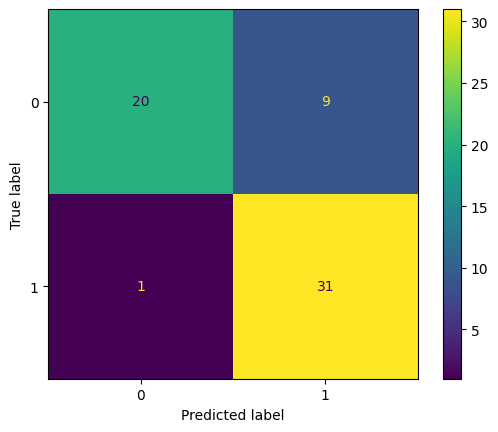

              precision    recall  f1-score   support

           0       0.95      0.69      0.80        29
           1       0.78      0.97      0.86        32

    accuracy                           0.84        61
   macro avg       0.86      0.83      0.83        61
weighted avg       0.86      0.84      0.83        61



In [41]:
print("\nMétricas de avaliação de treino:")
y_pred_train = gb.predict(X_train)
print(confusion_matrix(y_train, y_pred_train))
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()
print(classification_report(y_train, y_pred_train))

print("\nMétricas de avaliação de teste:")
y_pred_test = gb.predict(X_test)
print(confusion_matrix(y_test, y_pred_test))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()
print(classification_report(y_test, y_pred_test))

## XGBoost
XGBoost com profundidade máxima de 6 e taxa de aprendizado de 0.2

In [42]:
# !pip install xgboost

In [43]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [44]:
X = df.drop(columns='target', axis=1)
y = df['target']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
xgb = XGBClassifier(max_depth=6, learning_rate= 0.2, random_state=42)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)


Métricas de avaliação de treino:
[[109   0]
 [  0 133]]


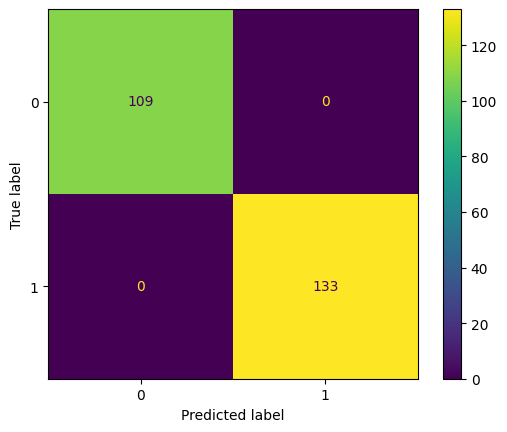

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           1       1.00      1.00      1.00       133

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242


Métricas de avaliação de teste:
[[25  4]
 [ 7 25]]


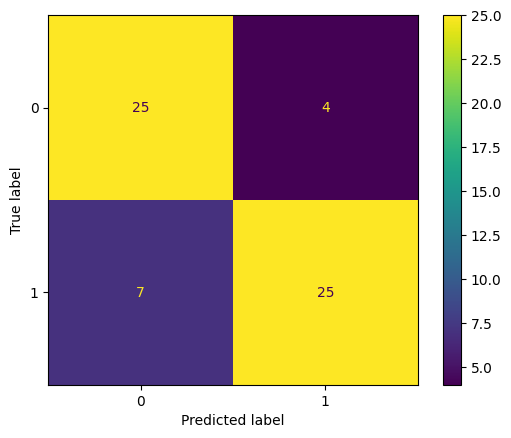

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        29
           1       0.86      0.78      0.82        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [46]:
print("\nMétricas de avaliação de treino:")
y_pred_train = xgb.predict(X_train)
print(confusion_matrix(y_train, y_pred_train))
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()
print(classification_report(y_train, y_pred_train))

print("\nMétricas de avaliação de teste:")
y_pred_test = xgb.predict(X_test)
print(confusion_matrix(y_test, y_pred_test))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()
print(classification_report(y_test, y_pred_test))